In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image,ImageStat
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

#for dirname, _, filenames in os.walk('/kaggle/input'):

base_directories=[]
file_name=[]

def getDirectories(dataset_path):
    directories=[]
    for dirname,_,filenames in os.walk(dataset_path):
        directories.append(dirname)
    return directories
    
def getDaframe(directories):
    imagePaths = []
    especes= []
    statuts=[]
    maladies=[]
    extensions=[]
    tailleFichiers=[]
    largeurs=[]
    hauteurs=[]
    contrastes=[]
    luminosites=[]
    flous=[]
    for directory in directories[1:]:
        dirname = os.path.basename(directory)
        datas=dirname.split("___")
        espece=datas[0]
        if len(datas)>1:
            maladie=datas[1]
        if "healthy" in dirname:
            statut="sain"
        else:
            statut="malade"
        
        for file in os.listdir(directory):
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                imagePath=os.path.join(directory, file)
                extension = os.path.splitext(image_path)[1]
                taille=os.stat(imagePath).st_size
                img = Image.open(imagePath)
                img_array = np.array(img)
                largeur = img.width 
                hauteur = img.height 
                stat = ImageStat.Stat(img)
                #r,g,b = stat.mean
                luminosite=stat.mean[0]
                contraste=stat.stddev[0] 
                gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                flou=cv2.Laplacian(gray_image, cv2.CV_64F).var()
                
                imagePaths.append(imagePath)
                especes.append(espece)
                statuts.append(statut)
                maladies.append(maladie)
                extensions.append(extension)
                tailleFichiers.append(taille)
                largeurs.append(largeur)
                hauteurs.append(hauteur)
                contrastes.append(contraste)
                luminosites.append(luminosite)
                flous.append(flou)
    
    df = pd.DataFrame({
        'image_path': imagePaths,
        #variables qualitatives
        'Extension':extensions,
        'Statut':statuts,
        'Espèce': especes,
        'Catégorie':maladies,
        #variables quantitatives
        'Taille fichier':tailleFichiers,
        'Largeur':largeurs,
        'Hauteur':hauteurs,
        'Contraste':contrastes,
        'Luminosite':luminosites,
        'Flou':flous
    })
    return df

color_image_path = '/kaggle/input/plantvillage-dataset/color'
gray_image_path = '/kaggle/input/plantvillage-dataset/grayscale'
segmented_image_path = '/kaggle/input/plantvillage-dataset/segmented'

#data images originales    
color_image_directories=getDirectories(color_image_path)
df_color=getDaframe(color_image_directories)



In [ ]:
#data images segmentées
segmented_image_directories=getDirectories(segmented_image_path)
df_segmented=getDaframe(segmented_image_directories)

In [ ]:
#data images niveau de gris  
gray_image_directories=getDirectories(gray_image_path)
df_gray=getDaframe(gray_image_directories)

In [120]:
print("Analyse variables qualitatives")
display(df_color['Extension'].value_counts())
print("\n")
display(df_color['Statut'].value_counts())
print("\n")
display(df_color['Espèce'].value_counts())
print("\n")
display(df_color['Catégorie'].value_counts())

print("\n Analyse variables quantitatives")
df_color.describe()


Analyse variables qualitatives


Extension
.JPG    54305
Name: count, dtype: int64

Statut
malade    39221
sain      15084
Name: count, dtype: int64

Espèce
Tomato                     18160
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2475
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64

Catégorie
healthy                                 15084
Haunglongbing_(Citrus_greening)          5507
Bacterial_spot                           5421
Tomato_Yellow_Leaf_Curl_Virus            5357
Late_blight                              2909
Powdery_mildew                           2887
Early_blight                             2000
Black_rot                                1801
Septoria_leaf_spot                       1771
Spider_mites Two-spotted_spider_mite     1676
Target_Spot                              1404
Esca_(Black_Measles)                     1383
Common_rust_                             1192
Leaf_scorch                              1109
Leaf_blight_(Isariopsis_Leaf_Spot)       1076
Northern_Leaf_Blight                      985
Leaf_Mold                                 952
Apple_scab                                630
Cercospora_leaf_spot Gray_leaf_spot       513
Tomato_mosaic_virus                       373
Cedar_apple_rust                          275
Name: count, dtype: int6


 Analyse variables quantitatives


,Taille fichier,Largeur,Hauteur,Contraste,Luminosite,Flou
count,54305.000000,54305.0,54305.0,54305.000000,54305.000000,54305.000000
mean,15666.796225,256.0,256.0,44.910411,118.937930,3808.218985
std,4423.033492,0.0,0.0,12.560879,20.107752,3572.660171
min,3440.000000,256.0,256.0,7.803641,8.298203,5.124209
25%,12282.000000,256.0,256.0,35.877709,106.931549,908.819952
50%,15956.000000,256.0,256.0,45.991453,118.517578,3056.293876
75%,19049.000000,256.0,256.0,54.154539,130.033234,5767.452982
max,121652.000000,256.0,256.0,94.061988,233.149734,27086.635041


Quelques plots


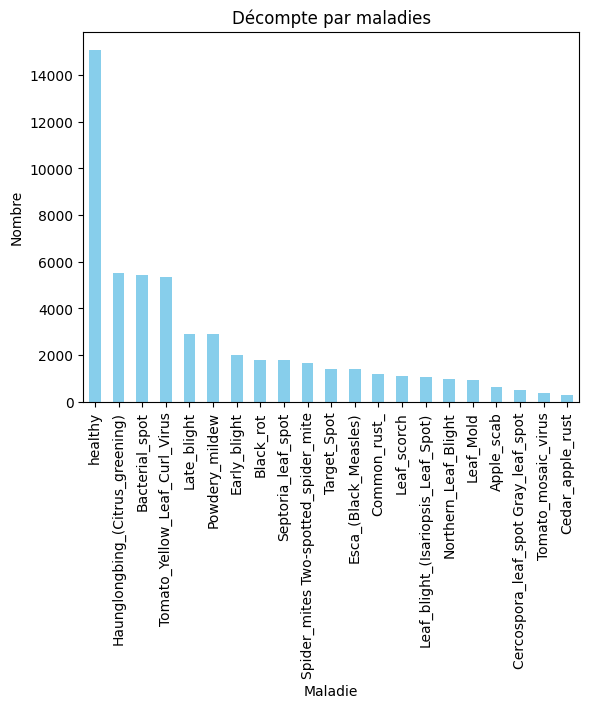

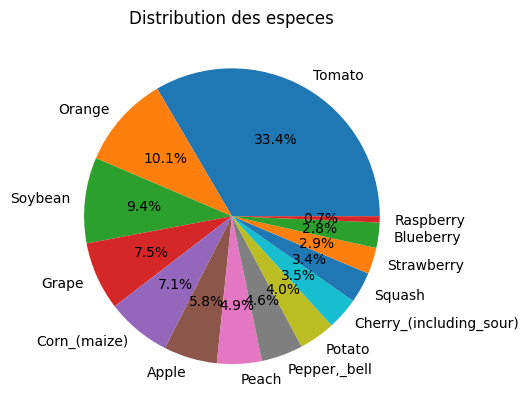

<Axes: >

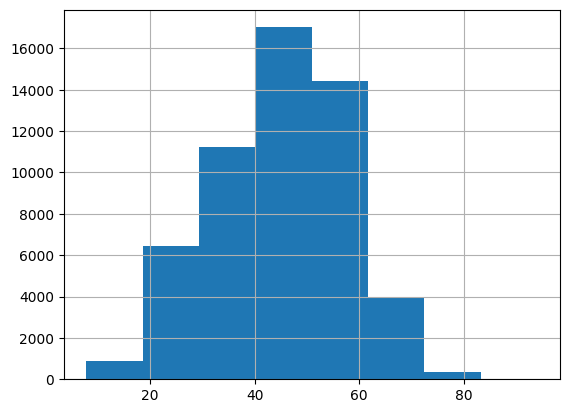

In [132]:
print("Quelques plots")
df_color['Catégorie'].value_counts().plot(kind="bar",color='skyblue')
plt.xlabel('Maladie')
plt.ylabel('Nombre')
plt.title('Décompte par maladies')
plt.show()

df_color['Espèce'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution des especes')
plt.ylabel('')
plt.show()


df_color['Contraste'].hist(bins=8)
